In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
from importlib import reload
import ps.feature as pf

%matplotlib inline

/home/ryohayama/.local/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
train = pd.read_csv('train.csv')
train.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,...,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,...,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,...,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,...,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,...,3,1,1,3,0,0,0,1,1,0


In [3]:
vec1 = train.ps_ind_02_cat
vec2 = train.ps_ind_04_cat
vec3 = train.ps_reg_03
target = train.target

In [4]:
reload(pf)

<module 'ps.feature' from '/home/ryohayama/python_current/porto_seguro/ps/feature.py'>

In [5]:
f1 = pf.CategoricalFeature(vec1, target=target)

In [6]:
print(f1.data)
print(f1.target)

0         2
1         1
2         4
3         1
4         2
5         1
6         1
7         1
8         1
9         1
10        2
11        1
12        1
13        1
14        1
15        1
16        2
17        1
18        1
19        1
20        1
21        1
22        3
23        1
24        1
25        1
26        1
27        1
28        2
29        2
         ..
595182    1
595183    1
595184    1
595185    2
595186    1
595187    1
595188    1
595189    1
595190    2
595191    1
595192    1
595193    2
595194    1
595195    3
595196    1
595197    1
595198    1
595199    1
595200    1
595201    2
595202    1
595203    2
595204    2
595205    3
595206    1
595207    1
595208    1
595209    1
595210    2
595211    1
Name: ps_ind_02_cat, Length: 595212, dtype: int64
0         0
1         0
2         0
3         0
4         0
5         0
6         0
7         0
8         0
9         1
10        0
11        0
12        0
13        0
14        0
15        0
16        0
17        0
18

In [7]:
print(f1.num_samples)
print(f1.unique_values)
print(f1.num_unique_values)

595212
[-1, 1, 2, 3, 4]
5


In [8]:
print(f1.value_counts)
print(f1.value_frequencies)
print(f1.feature_type)

 1    431859
 2    123573
 3     28186
 4     11378
-1       216
Name: ps_ind_02_cat, dtype: int64
 1    0.725555
 2    0.207612
 3    0.047355
 4    0.019116
-1    0.000363
Name: ps_ind_02_cat, dtype: float64
categorical


In [9]:
print(f1.contingency_table)
print(f1.frequency_table)
print(f1.conditional_probas)

target              0      1
ps_ind_02_cat               
-1                176     40
 1             416431  15428
 2             118860   4713
 3              27137   1049
 4              10914    464
target                0         1
ps_ind_02_cat                    
-1             0.000296  0.000067
 1             0.699635  0.025920
 2             0.199694  0.007918
 3             0.045592  0.001762
 4             0.018336  0.000780
target         0         1
-1      0.814815  0.185185
 1      0.964275  0.035725
 2      0.961861  0.038139
 3      0.962783  0.037217
 4      0.959220  0.040780


In [10]:
f1.conditional_probas.to_dict()

{0: {-1: 0.8148148148148148,
  1: 0.964275376917003,
  2: 0.9618606006166396,
  3: 0.9627829418860427,
  4: 0.9592195464932326},
 1: {-1: 0.18518518518518517,
  1: 0.035724623082996995,
  2: 0.038139399383360445,
  3: 0.037217058113957285,
  4: 0.04078045350676745}}

In [11]:
f1.convert2proba(target_class=1)

0         0.038139
1         0.035725
2         0.040780
3         0.035725
4         0.038139
5         0.035725
6         0.035725
7         0.035725
8         0.035725
9         0.035725
10        0.038139
11        0.035725
12        0.035725
13        0.035725
14        0.035725
15        0.035725
16        0.038139
17        0.035725
18        0.035725
19        0.035725
20        0.035725
21        0.035725
22        0.037217
23        0.035725
24        0.035725
25        0.035725
26        0.035725
27        0.035725
28        0.038139
29        0.038139
            ...   
595182    0.035725
595183    0.035725
595184    0.035725
595185    0.038139
595186    0.035725
595187    0.035725
595188    0.035725
595189    0.035725
595190    0.038139
595191    0.035725
595192    0.035725
595193    0.038139
595194    0.035725
595195    0.037217
595196    0.035725
595197    0.035725
595198    0.035725
595199    0.035725
595200    0.035725
595201    0.038139
595202    0.035725
595203    0.

In [12]:
f1.calculate_deviation(mode='ratio')

(target         0         1
 -1      0.845636  5.080872
  1      1.000750  0.980166
  2      0.998244  1.046420
  3      0.999201  1.021114
  4      0.995503  1.118882,              max       min
 target                    
 0       1.000750  0.845636
 1       5.080872  0.980166)

In [13]:
f2 = pf.CategoricalFeature(vec2)

In [14]:
print(f2.data)
print(f2.target)

0         1
1         0
2         1
3         0
4         1
5         0
6         1
7         0
8         1
9         0
10        0
11        1
12        1
13        1
14        0
15        1
16        0
17        0
18        0
19        1
20        0
21        1
22        1
23        1
24        0
25        0
26        1
27        0
28        1
29        0
         ..
595182    0
595183    0
595184    0
595185    1
595186    1
595187    0
595188    0
595189    0
595190    0
595191    0
595192    0
595193    0
595194    1
595195    1
595196    0
595197    1
595198    1
595199    1
595200    0
595201    1
595202    0
595203    1
595204    1
595205    1
595206    0
595207    0
595208    0
595209    0
595210    1
595211    0
Name: ps_ind_04_cat, Length: 595212, dtype: int64
None


In [15]:
print(f2.num_samples)
print(f2.unique_values)
print(f2.num_unique_values)

595212
[-1, 0, 1]
3


In [16]:
print(f2.value_counts)
print(f2.value_frequencies)
print(f2.feature_type)

 0    346965
 1    248164
-1        83
Name: ps_ind_04_cat, dtype: int64
 0    0.582927
 1    0.416934
-1    0.000139
Name: ps_ind_04_cat, dtype: float64
categorical


In [17]:
print(f2.contingency_table)
print(f2.frequency_table)
print(f2.conditional_probas)

None
None
None


In [18]:
reload(pf)

<module 'ps.feature' from '/home/ryohayama/python_current/porto_seguro/ps/feature.py'>

In [19]:
d1 = pd.concat([vec3, target], axis=1).replace({-1:np.NaN}).dropna()

In [20]:
d1.shape

(487440, 2)

In [21]:
f3 = pf.OrdinalFeature(vec3)

In [22]:
print(f3.max_value)
print(f3.min_value)

4.0379450219
-1.0


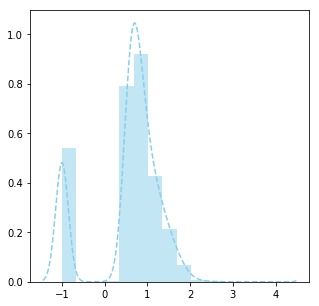

In [23]:
f3.statsmodelsKDE(bw=0.15, hist_bins=15)

In [24]:
a = f3.calculateDensityRatio(target, np.linspace(f3.min_value, f3.max_value, 100), bw=0.15)

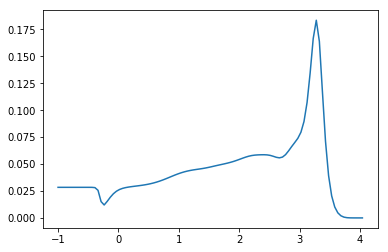

In [25]:
plt.plot(np.linspace(f3.min_value, f3.max_value, 100), a)

In [26]:
scipy.stats.describe(a)

DescribeResult(nobs=100, minmax=(4.7288416105724958e-08, 0.18348928160704342), mean=0.044310037979429444, variance=0.0010621438269957195, skewness=2.003805627705919, kurtosis=5.674532790813306)

In [27]:
b = f3.convert2DensityRatio(target, np.linspace(f3.min_value, f3.max_value, 100), bw=0.15)

In [28]:
b.unique()

array([  3.51334410e-02,   3.62446393e-02,   2.83932747e-02,
         3.23913225e-02,   3.74156170e-02,   5.85054722e-02,
         3.31948818e-02,   3.86062910e-02,   3.01743887e-02,
         3.16985287e-02,   3.41111242e-02,   4.18479851e-02,
         3.06058441e-02,   4.58461482e-02,   3.97701516e-02,
         4.34391513e-02,   4.45564602e-02,   4.95027635e-02,
         4.08622623e-02,   4.40488560e-02,   4.63499936e-02,
         4.49941658e-02,   3.11079458e-02,   4.27082382e-02,
         4.54072859e-02,   5.01270412e-02,   5.64040278e-02,
         5.53978326e-02,   4.69310334e-02,   4.82297017e-02,
         4.88768651e-02,   5.33097954e-02,   4.75701419e-02,
         5.07877357e-02,   5.15245017e-02,   5.23638177e-02,
         5.78965571e-02,   2.94346868e-02,   5.43390592e-02,
         2.97922878e-02,   6.62553315e-02,   5.72621409e-02,
         5.86439490e-02,   5.86167092e-02,   2.90715223e-02,
         2.86629996e-02,   7.39046407e-02,   5.62673607e-02,
         2.74409459e-02,

In [29]:
b.describe()

count    5.952120e+05
mean     3.636460e-02
std      6.339994e-03
min      4.728842e-08
25%      3.169853e-02
50%      3.513344e-02
75%      4.086226e-02
max      1.345128e-01
dtype: float64

In [30]:
reload(pf)

<module 'ps.feature' from '/home/ryohayama/python_current/porto_seguro/ps/feature.py'>

In [31]:
vec4 = train.ps_car_12
f4 = pf.OrdinalFeature(vec4)
print(f4.max_value)
print(f4.min_value)

1.2649110641
-1.0


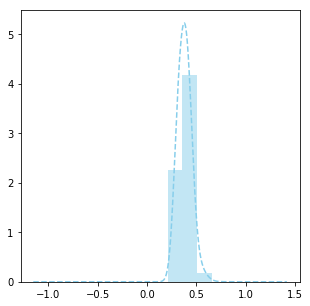

In [32]:
f4.statsmodelsKDE(bw=0.05, hist_bins=15)

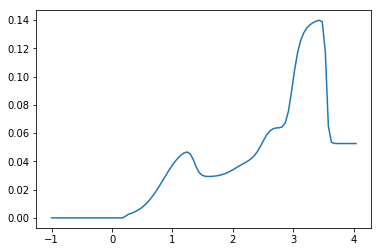

In [33]:
b = f4.calculateDensityRatio(target, np.linspace(f4.min_value, f4.max_value, 100), bw=0.06)
plt.plot(np.linspace(f3.min_value, f3.max_value, 100), b)